<a href="https://colab.research.google.com/github/sete50/navaraj/blob/main/Classification_poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
import zipfile

# convert the zip file into Pandas dataframe
column_names = []
with zipfile.ZipFile('/content/adult.zip', 'r') as z:
    with z.open('adult.names') as f:
        for line in f:
            line = line.decode('utf-8').strip()
            if ':' in line and not line.startswith('|'):
                column_names.append(line.split(':')[0].strip())

    # Read the adult.data from the zip file into a pandas DataFrame
    with z.open('adult.data') as f:
        df = pd.read_csv(f, header=None)

if len(column_names) == 14:
    column_names.append('income')

df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
df.shape

(32561, 15)

In [22]:
# check for null values
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [23]:
# check for duplicate values
df.duplicated().sum()

np.int64(24)

In [24]:
duplicate_value_columns = []
for column in df.columns:
    if df[column].duplicated().any():
        duplicate_value_columns.append(column)

print("Columns with duplicate values:")
print(duplicate_value_columns)


Columns with duplicate values:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [25]:
df["income"].value_counts()

,count
income,
<=50K,24720
>50K,7841


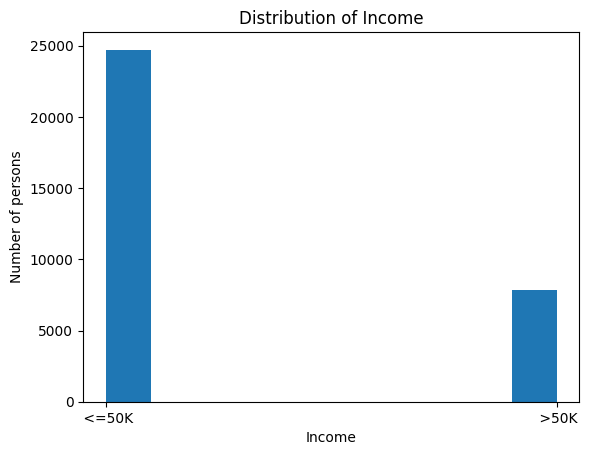

In [26]:
plt.hist(df["income"] )
plt.xlabel("Income")
plt.ylabel("Number of persons")
plt.title("Distribution of Income")
plt.tight_layout
plt.show()

In [27]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
df = df.drop(columns=["fnlwgt", "education-num", "capital-gain", "capital-loss"], axis= 1)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [29]:
df['sex'] = df['sex'].replace({' Male': 1, ' Female': 0})
df

/tmp/ipython-input-690441622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({' Male': 1, ' Female': 0})


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,20,United-States,<=50K


In [30]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
edu_order = {
    ' Preschool': 0,
    ' 1st-4th': 1,
    ' 5th-6th': 2,
    ' 7th-8th': 3,
    ' 9th': 4,
    ' 10th': 5,
    ' 11th': 6,
    ' 12th': 7,
    ' HS-grad': 8,
    ' Some-college': 9,
    ' Assoc-acdm': 10,
    ' Assoc-voc': 11,
    ' Bachelors': 12,
    ' Masters': 13,
    ' Prof-school': 14,
    ' Doctorate': 15
}

In [32]:
df['education'] = df['education'].map(edu_order)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,12,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,<=50K
1,50,Self-emp-not-inc,12,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,<=50K
2,38,Private,8,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,<=50K
3,53,Private,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,<=50K
4,28,Private,12,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,<=50K


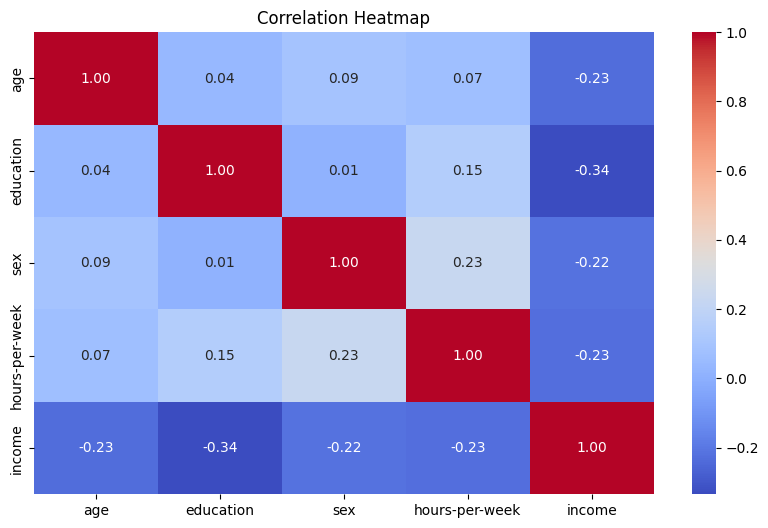

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True), cmap= "coolwarm", annot= True, fmt= ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [34]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [35]:
df['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [36]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].replace(' ?', ' Unknown')

In [37]:
df['income'] = df['income'].replace({' <=50K': 1, ' >50K': 0})
df

/tmp/ipython-input-1154406053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({' <=50K': 1, ' >50K': 0})


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,12,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,1
1,50,Self-emp-not-inc,12,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,1
2,38,Private,8,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,1
3,53,Private,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,1
4,28,Private,12,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,10,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,1
32557,40,Private,8,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,0
32558,58,Private,8,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,1
32559,22,Private,8,Never-married,Adm-clerical,Own-child,White,1,20,United-States,1


In [38]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
display(df_encoded.head())

,age,education,sex,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Unknown,native-country_ Vietnam,native-country_ Yugoslavia
0,39,12,1,40,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,12,1,13,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,38,8,1,40,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,6,1,40,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,12,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df_encoded)

In [42]:
pca = PCA(n_components= 0.95)
df_pca = pca.fit_transform(df_scaled)
print(df_pca)

[[-0.38150574  1.09178286  0.75221541 ...  0.14181083 -0.28072287
   0.01421435]
 [ 2.10901648  0.39835442  1.05159852 ... -2.67671772  0.32721489
  -0.21187406]
 [-0.70034741  0.9070331  -1.11561692 ...  0.26021178 -0.21140837
   1.01318965]
 ...
 [-0.71392378  0.13349596  0.94930267 ...  0.78089678  0.33376496
  -0.25637515]
 [-2.22060816  1.48776374 -0.79262328 ... -0.43252167  0.67364263
  -0.81302556]
 [ 3.19054096 -0.269235    1.35597003 ...  1.0734408   0.88933891
  -0.48231247]]


In [43]:
X = df_encoded.drop('income', axis=1)
Y = df_encoded['income']

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)


In [45]:
model = LogisticRegression(max_iter= 5000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [46]:
# SHAP
import shap

In [47]:
# SHAP Explaination
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)


In [48]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_[0]}).sort_values('Importance', ascending=False)
print(importance.head(10))

                                       Feature  Importance
43                    native-country_ Columbia    1.513488
25                 occupation_ Priv-house-serv    1.276197
11                      workclass_ Without-pay    1.228370
21                 occupation_ Farming-fishing    1.036203
8                  workclass_ Self-emp-not-inc    0.915331
24                   occupation_ Other-service    0.874686
45          native-country_ Dominican-Republic    0.867415
67  native-country_ Outlying-US(Guam-USVI-etc)    0.824945
34                     relationship_ Own-child    0.821644
9                         workclass_ State-gov    0.807069


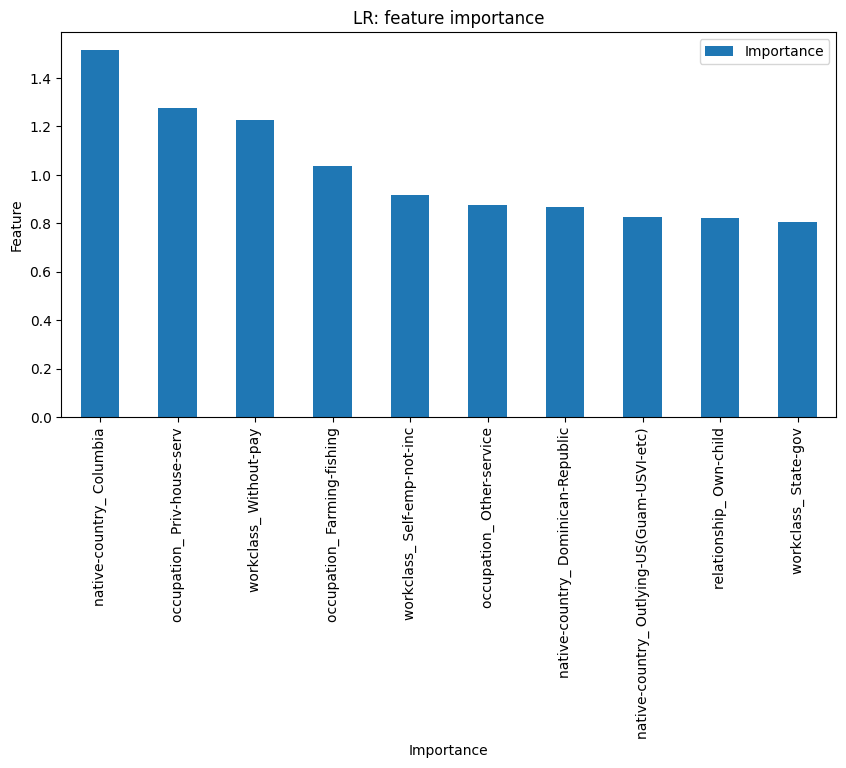

In [49]:
importance.head(10).plot(x='Feature', y='Importance', kind='bar', figsize=(10, 5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('LR: feature importance')
plt.show()

In [50]:
# prediction
Y_predict = model.predict(X_test)
Y_predict

array([1, 0, 0, ..., 0, 1, 1])

In [51]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predict)*100)

Accuracy: 83.26424074927068


In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_predict, Y_test))

              precision    recall  f1-score   support

           0       0.55      0.70      0.61      1233
           1       0.92      0.86      0.89      5280

    accuracy                           0.83      6513
   macro avg       0.73      0.78      0.75      6513
weighted avg       0.85      0.83      0.84      6513



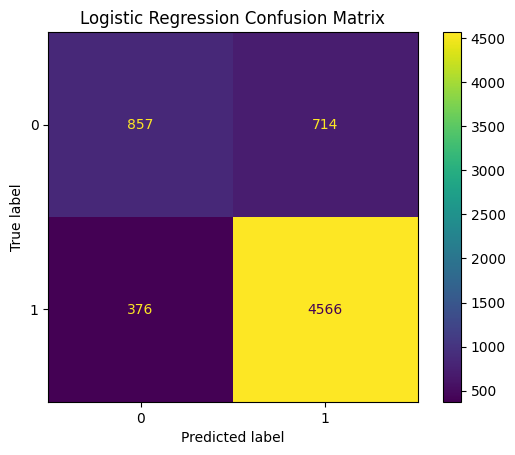

In [53]:
cm= confusion_matrix(Y_test, Y_predict)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [54]:
Recall = cm[1,1]/(cm[1,0]+cm[1,1])
Recall

np.float64(0.9239174423310401)

In [55]:
precision = cm[1,1] / (cm[1,1] + cm[0,1])
print(f"Precision: {precision}")

Precision: 0.8647727272727272


In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
Y_predict_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshhold = roc_curve(Y_test, Y_predict_prob)
auc_score = roc_auc_score(Y_test, Y_predict_prob)
print(f"ROC_AUC Score: {auc_score}")

ROC_AUC Score: 0.8867102179038784


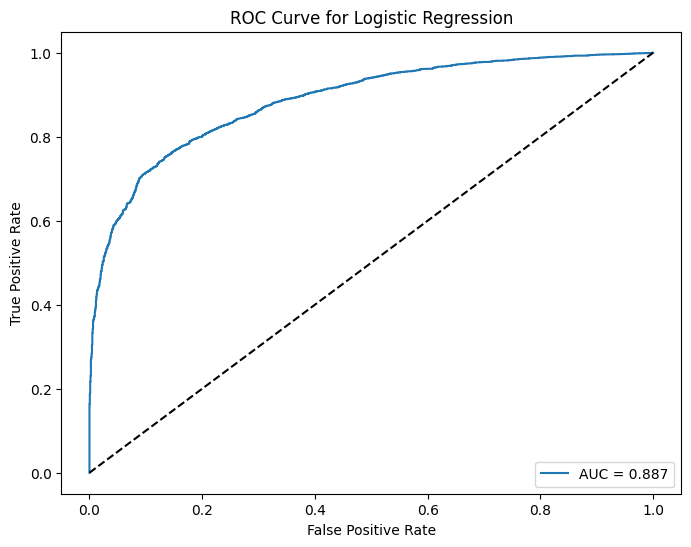

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,label = f'AUC = {auc_score:.3f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
feat_label = X_train.columns

In [61]:
forest = RandomForestClassifier(n_estimators= 500, random_state= 42)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [62]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1][:10]

In [63]:
for f in range(len(indices)):
  print("%2d) %-*s %f" % (f + 1, 30, feat_label[indices[f]], importances[indices[f]]))

 1) age                            0.282158
 2) education                      0.154176
 3) hours-per-week                 0.138340
 4) marital-status_ Married-civ-spouse 0.095349
 5) marital-status_ Never-married  0.035338
 6) occupation_ Exec-managerial    0.024372
 7) occupation_ Prof-specialty     0.021125
 8) sex                            0.021014
 9) relationship_ Not-in-family    0.020596
10) relationship_ Own-child        0.013962


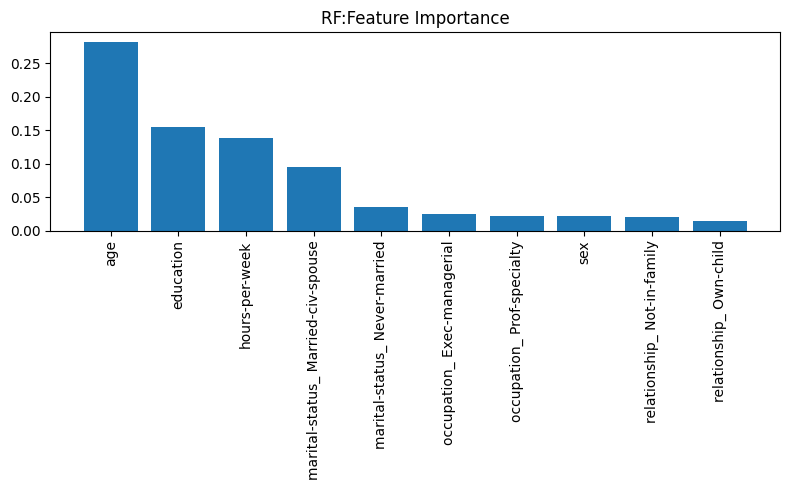

In [64]:
plt.figure(figsize=(8, 5))
plt.title('RF:Feature Importance')
plt.bar(range(10), importances[indices], align= 'center')
plt.xticks(range(10), feat_label[indices], rotation = 90)
plt.tight_layout()
plt.show()

In [65]:
Y_predict = forest.predict(X_test)
Y_predict

array([1, 0, 0, ..., 0, 1, 1])

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_predict, Y_test))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1349
           1       0.90      0.87      0.88      5164

    accuracy                           0.82      6513
   macro avg       0.73      0.76      0.74      6513
weighted avg       0.83      0.82      0.83      6513



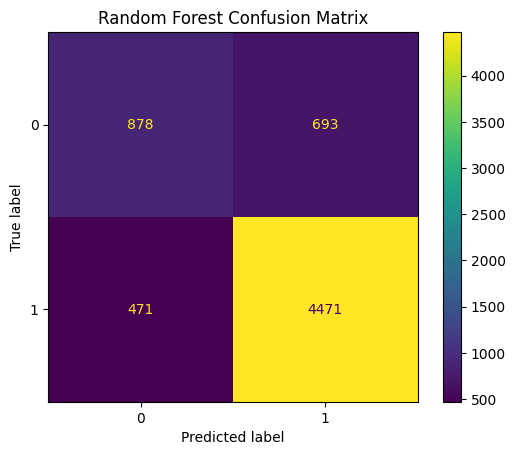

In [67]:
cm= confusion_matrix(Y_test, Y_predict)
disp= metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [68]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predict)*100)

Accuracy: 82.12805158912944


In [69]:
Recall = cm[1,1]/(cm[1,0]+cm[1,1])
Recall

np.float64(0.9046944556859571)

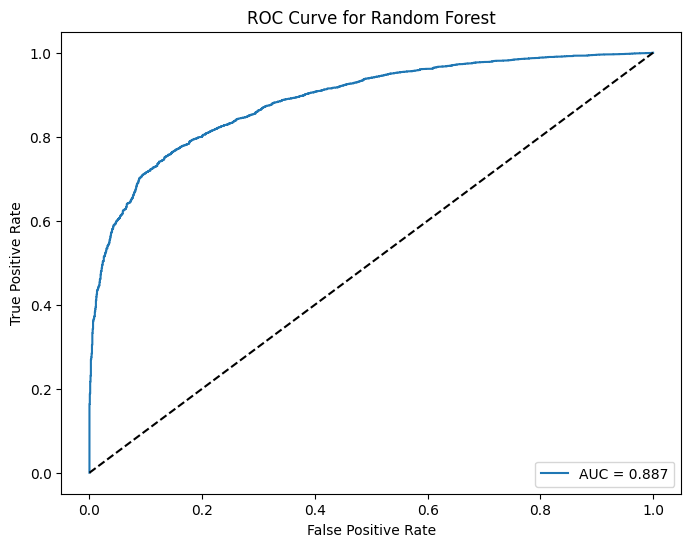

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,label = f'AUC = {auc_score:.3f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc = "lower right")
plt.show()

In [71]:
from sklearn.svm import SVC


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
clf = SVC(kernel='rbf', C = 1.0, random_state= 42)
clf.fit(X_train, Y_train)

SVC(random_state=42)

In [73]:
Y_predict_svc = clf.predict(X_test)
display(Y_predict_svc)

array([1, 1, 0, ..., 0, 1, 1])

In [74]:
print('SVC Model Accuracy:', metrics.accuracy_score(Y_test, Y_predict_svc) * 100)

SVC Model Accuracy: 82.65008444649163


In [75]:
print('SVC Classification Report:')
print(classification_report(Y_test, Y_predict_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.44      0.55      1571
           1       0.84      0.95      0.89      4942

    accuracy                           0.83      6513
   macro avg       0.79      0.69      0.72      6513
weighted avg       0.82      0.83      0.81      6513



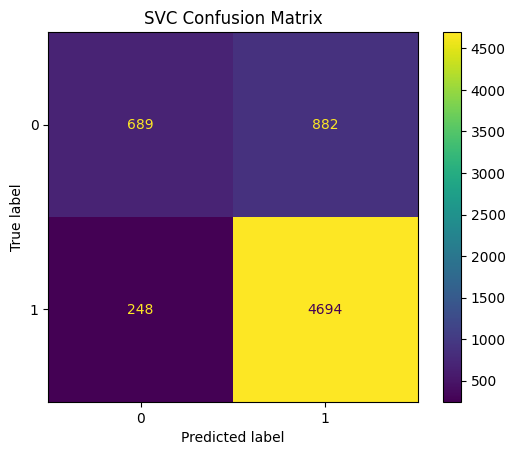

In [76]:
cm_svc = confusion_matrix(Y_test, Y_predict_svc)
disp_svc = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=clf.classes_)
disp_svc.plot()
plt.title('SVC Confusion Matrix')
plt.show()

In [77]:
Y_predict_svc_prob = clf.decision_function(X_test)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, Y_predict_svc_prob)
auc_score_svc = roc_auc_score(Y_test, Y_predict_svc_prob)
print(f'SVC ROC AUC Score: {auc_score_svc:.3f}')

SVC ROC AUC Score: 0.879


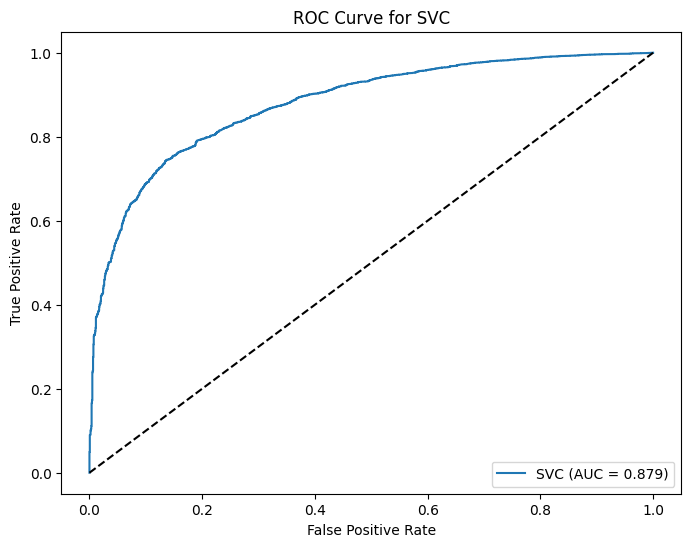

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_score_svc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()

In [79]:
# permutation for feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, Y_test, n_repeats = 10, random_state = 42)
importance = result.importances_mean
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance}).sort_values('Importance', ascending=False)
print(feature_importance.head(10))

                               Feature  Importance
13  marital-status_ Married-civ-spouse    0.054813
1                            education    0.043298
3                       hours-per-week    0.008844
20         occupation_ Exec-managerial    0.006756
0                                  age    0.006510
2                                  sex    0.006234
36                  relationship_ Wife    0.005742
8          workclass_ Self-emp-not-inc    0.004790
24           occupation_ Other-service    0.003470
26          occupation_ Prof-specialty    0.003470


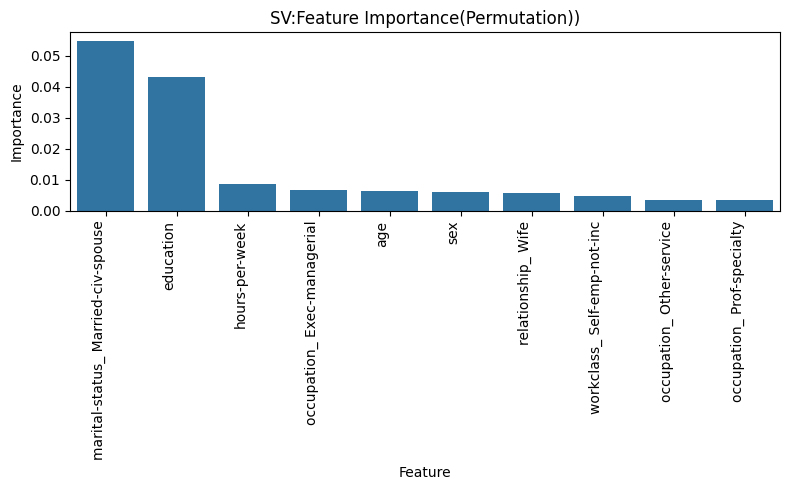

In [80]:
plt.figure(figsize=(8, 5))
plt.title('SV:Feature Importance(Permutation))')
sns.barplot(x='Feature', y='Importance', data=feature_importance.head(10), legend=False)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Random Forest ROC AUC Score: 0.865


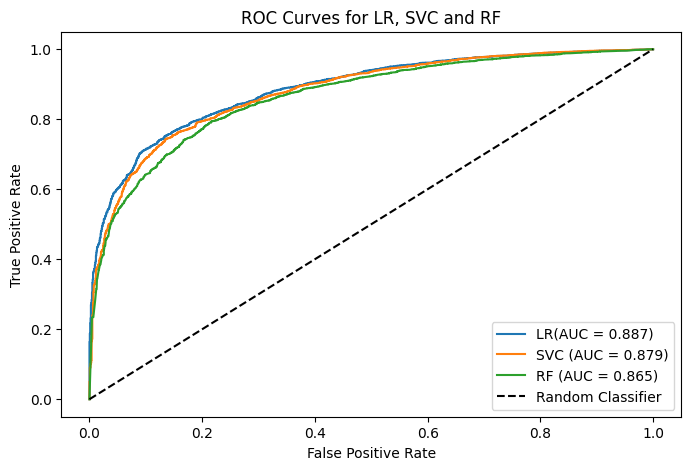

In [81]:
Y_predict_forest_prob = forest.predict_proba(X_test)[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test, Y_predict_forest_prob)
auc_score_forest = roc_auc_score(Y_test, Y_predict_forest_prob)
print(f'Random Forest ROC AUC Score: {auc_score_forest:.3f}')

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'LR(AUC = {auc_score:.3f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_score_svc:.3f})')
plt.plot(fpr_forest, tpr_forest, label=f'RF (AUC = {auc_score_forest:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LR, SVC and RF')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

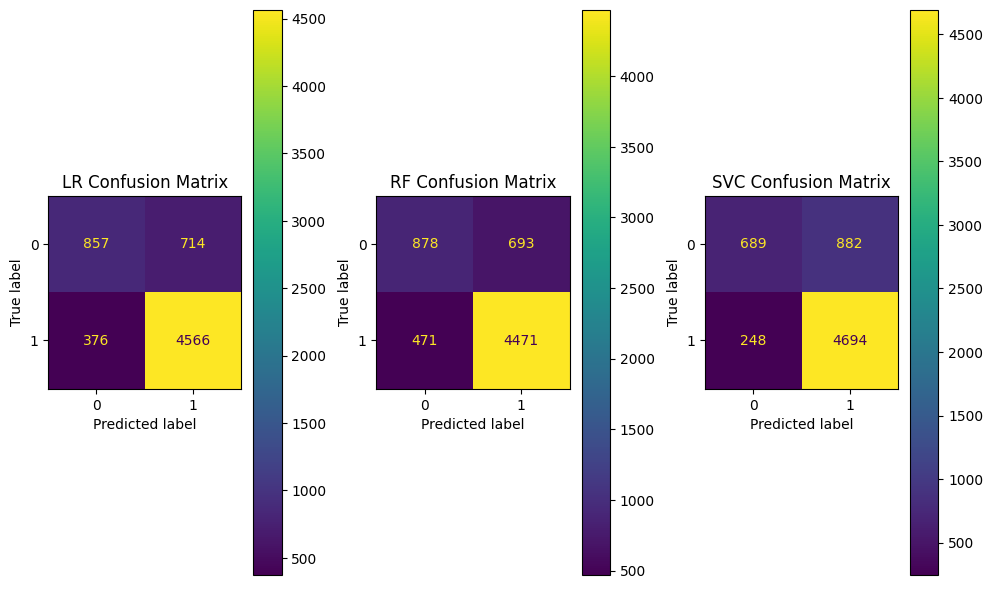

In [82]:
# comparision of confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(Y_test, model.predict(X_test))
disp_lr = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model.classes_)
disp_lr.plot(ax=axes[0])
axes[0].set_title('LR Confusion Matrix')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(Y_test, forest.predict(X_test))
disp_rf = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=forest.classes_)
disp_rf.plot(ax=axes[1])
axes[1].set_title('RF Confusion Matrix')

# Support Vector Classifier Confusion Matrix
cm_svc = confusion_matrix(Y_test, clf.predict(X_test))
disp_svc = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=clf.classes_)
disp_svc.plot(ax=axes[2])
axes[2].set_title('SVC Confusion Matrix')

plt.tight_layout()
plt.show()